### One Hot Encoding - Nominal Encoding

✅ This creates a binary column for each category.

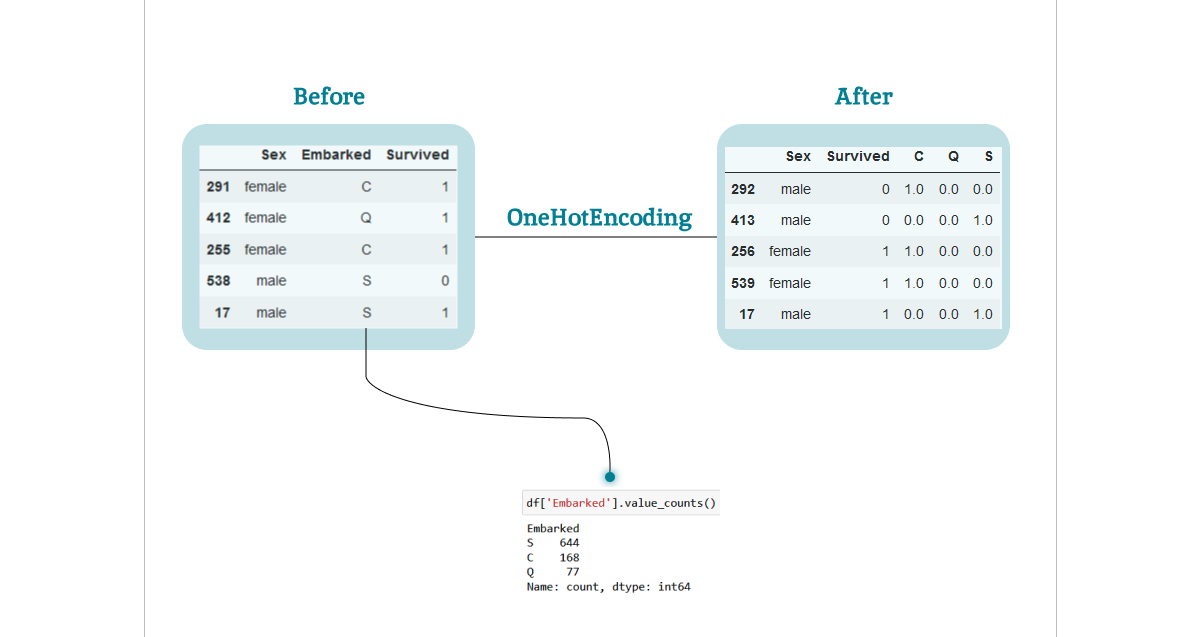

In [1]:
import pandas as pd

### Example 1

In [2]:
df0 = pd.read_csv("../../C_Datasets/titanic_train_original.csv")
df  = df0[['Sex', 'Embarked', 'Survived']]
df = df.dropna()
df.head()

,Sex,Embarked,Survived
0,male,S,0
1,female,C,1
2,female,S,1
3,female,S,1
4,male,S,0


In [3]:
df.iloc[[291, 412, 255, 538, 17], :]

,Sex,Embarked,Survived
292,male,C,0
413,male,S,0
256,female,C,1
539,female,C,1
17,male,S,1


In [4]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

# set_output(transform="pandas") --> use to transform Pandas DataFrame

In [7]:
ohetransform = ohe.fit_transform(df[['Embarked']])

In [8]:
ohetransform

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [9]:
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [10]:
ohetransform.columns = ohe.categories_[0]

In [11]:
df_final = pd.concat([df, ohetransform], axis='columns').drop(columns=['Embarked'])

In [12]:
df_final.iloc[[291, 412, 255, 538, 17], :]

,Sex,Survived,C,Q,S
292,male,0,1.0,0.0,0.0
413,male,0,0.0,0.0,1.0
256,female,1,1.0,0.0,0.0
539,female,1,1.0,0.0,0.0
17,male,1,0.0,0.0,1.0


### Example 2

In [13]:
df0 = pd.read_csv("../../C_Datasets/Co2_Emission.csv")
df0.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [14]:
df0['FUELTYPE'].value_counts()

FUELTYPE
X    514
Z    434
E     92
D     27
Name: count, dtype: int64

In [15]:
ohe_2 = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [16]:
df_fuel_type = ohe_2.fit_transform(df0[['FUELTYPE']])

In [17]:
df_fuel_type.columns = ohe_2.categories_[0]

In [18]:
df_fuel_type

,D,E,X,Z
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
1062,0.0,0.0,1.0,0.0
1063,0.0,0.0,1.0,0.0
1064,0.0,0.0,1.0,0.0
1065,0.0,0.0,1.0,0.0
